In [1]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
INFO: pip is looking at multiple versions of albumentations to determine which version is compatible with other requirements. This could take a while.
  Using cached albumentations-1.3.1-py3-none-any.whl.metadata (34 kB)
Using cached albumentations-1.3.1-py3-none-any.whl (125 kB)
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   -

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Subhadeep\AppData\Local\Temp\pip-install-mgbxsgdk\tensorflow-gpu_010b522527e3463ca563eeacc40355be\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not 

In [3]:
import os
import time
import uuid
import cv2

In [4]:
uuid.uuid1()

UUID('b6f75325-d022-11ee-b9ee-1062e5e49eb6')

In [5]:
!labelme


2024-02-19 16:09:47,340 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\Subhadeep\.labelmerc


STEP:02 (Review Dataset and Build image loading Fn)

In [5]:
import tensorflow as tf
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt


In [7]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    

In [8]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [9]:
images= tf.data.Dataset.list_files(r"D:\New_Programming\CAPSTONE\Saved_new\*.jpg", shuffle=False)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: D:\\New_Programming\\CAPSTONE\\Saved_new\\*.jpg'

In [10]:
images.as_numpy_iterator().next()

NameError: name 'images' is not defined

In [11]:
def load_image(x):
    byte_img= tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images= images.map(load_image)

NameError: name 'images' is not defined

In [11]:
images.as_numpy_iterator().next()

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  8,   8,   8],
        [  0,   0,   0]],

       [[241, 241, 241],
        [241, 241, 241],
        [241, 241, 241],
        ...,
        [ 97,  97,  97],
        [ 95,  95,  95],
        [103, 103, 103]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [ 97,  97,  97],
        [ 91,  91,  91],
        [116, 116, 116]],

       ...,

       [[182, 182, 182],
        [185, 185, 185],
        [193, 193, 193],
        ...,
        [146, 146, 146],
        [147, 147, 147],
        [152, 152, 152]],

       [[180, 180, 180],
        [182, 182, 182],
        [189, 189, 189],
        ...,
        [148, 148, 148],
        [152, 152, 152],
        [154, 154, 154]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  5,   5,   5],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  2,   2,   2]]

In [12]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [13]:
image_generator=images.batch(4).as_numpy_iterator()

In [14]:
plot_images=image_generator.next()

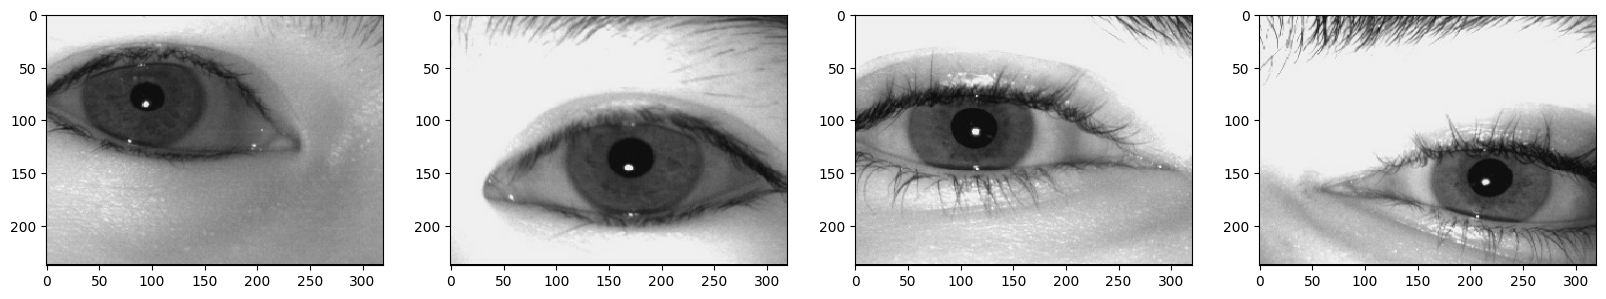

In [23]:
fig, ax= plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

Step: 03 (Partition of Unaugmented Data)

In [8]:
for folder in ['Train','Test','Val']:
    for file in os.listdir(os.path.join(r"D:\New_Programming\CAPSTONE\self_model", folder,'images')):
        filename=file.split('.')[0]+'.json'
        existing_filepath= os.path.join(r"D:\New_Programming\CAPSTONE\self_model",'labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath= os.path.join(r"D:\New_Programming\CAPSTONE\self_model", folder,'labels',filename)
            os.replace(existing_filepath,new_filepath)

Step: 04(Apply Image Augmentation on Images and Labels using Albumentations)

In [92]:
import albumentations as alb

In [93]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [94]:
img = cv2.imread(os.path.join(r"D:\New_Programming\CAPSTONE\self_model","Train", "images","S5039L05.jpg"))

In [77]:
cv2.imshow("image",img)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [95]:
with open(os.path.join(r"D:\New_Programming\CAPSTONE\self_model","Train","labels","S5039L05.json"), 'r') as f:
    label = json.load(f)

In [96]:
print(label['shapes'][0]['points'])
print(label['shapes'][1]['points'])


[[217.5274725274725, 141.64835164835165], [266.42857142857144, 220.21978021978023]]
[[219.72527472527472, 143.84615384615387], [230.16483516483513, 182.30769230769232]]


In [97]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [98]:
label

{'version': '5.4.1',
 'flags': {},
 'shapes': [{'label': 'iris',
   'points': [[217.5274725274725, 141.64835164835165],
    [266.42857142857144, 220.21978021978023]],
   'group_id': None,
   'description': '',
   'shape_type': 'circle',
   'flags': {},
   'mask': None},
  {'label': 'pupil',
   'points': [[219.72527472527472, 143.84615384615387],
    [230.16483516483513, 182.30769230769232]],
   'group_id': None,
   'description': '',
   'shape_type': 'circle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\Saved_new\\S5039L05.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAHgAoABAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APGF

In [159]:
coords

[0.0008302122682005494,
 0.00086996336996337,
 0.0009026495964972528,
 0.0012300633394383394]

In [100]:
#  (x − h)2 + (y − k)2 = r2
import math
r= math.sqrt((coords[2]-coords[0])**2 + (coords[3]-coords[1])**2 )
print(r)

92.5461336928246


In [158]:
coords = list(np.divide(coords, [640,480,640,480]))

In [102]:
centerr=tuple([int(coords[2]),int(coords[3])])
print(centerr)

(0, 0)


In [154]:
augmented= augmentor(image=img, bboxes=[coords], class_labels=['iris'])

In [155]:
augmented['bboxes'][0][:2]

(0.49838827838827837, 0.42986568986568985)

In [156]:
tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int))

(224, 193)

In [111]:
r=int(r)
print(r)

92


In [157]:
tuple(np.multiply(coords[:2], [450,450]).astype(int))

(239, 187)

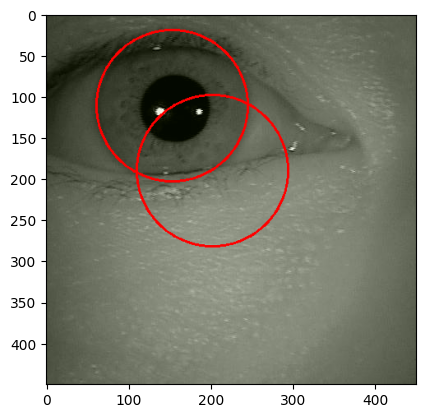

In [113]:
cv2.circle(augmented['image'], 
            tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              r,(255,0,0), 2)

plt.imshow(augmented['image'])

Step: 05(Build and Run Augmentation Pipeline)

In [114]:
for partition in ['Train','Test','Val']: 
    for image in os.listdir(os.path.join(r"D:\New_Programming\CAPSTONE\self_model", partition, "images")):
        img = cv2.imread(os.path.join(r"D:\New_Programming\CAPSTONE\self_model", partition, "images", image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join(r"D:\New_Programming\CAPSTONE\self_model", partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['iris'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

Requested crop size (450, 450) is larger than the image size (238, 320)
Requested crop size (450, 450) is larger than the image size (238, 320)
Requested crop size (450, 450) is larger than the image size (194, 259)
y_max is less than or equal to y_min for bbox [0.41654608463035026, 0.33795395590142674, 0.44998480058365764, 0.11665045395590143, 'iris'].
Requested crop size (450, 450) is larger than the image size (280, 320)
Requested crop size (450, 450) is larger than the image size (280, 320)
Requested crop size (450, 450) is larger than the image size (280, 320)
Requested crop size (450, 450) is larger than the image size (280, 320)
Requested crop size (450, 450) is larger than the image size (280, 320)
Requested crop size (450, 450) is larger than the image size (280, 320)
x_max is less than or equal to x_min for bbox [0.4918440934065934, 0.448489010989011, 0.480683379120879, 0.6110347985347986, 'iris'].
Requested crop size (450, 450) is larger than the image size (238, 320)
Reques

In [116]:
train_images = tf.data.Dataset.list_files(r"D:\New_Programming\CAPSTONE\aug_data\Train\images\*.jpg", shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [117]:
test_images = tf.data.Dataset.list_files(r"D:\New_Programming\CAPSTONE\aug_data\Test\images\*.jpg", shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [118]:
val_images = tf.data.Dataset.list_files(r"D:\New_Programming\CAPSTONE\aug_data\Val\images\*.jpg", shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [119]:
train_images.as_numpy_iterator().next()


array([[[0.42199755, 0.42199755, 0.42199755],
        [0.4357843 , 0.4357843 , 0.4357843 ],
        [0.4483456 , 0.4483456 , 0.4483456 ],
        ...,
        [0.63259804, 0.63259804, 0.63259804],
        [0.6635417 , 0.6635417 , 0.6635417 ],
        [0.6507353 , 0.6507353 , 0.6507353 ]],

       [[0.4377451 , 0.4377451 , 0.4377451 ],
        [0.45839462, 0.45839462, 0.45839462],
        [0.46170342, 0.46170342, 0.46170342],
        ...,
        [0.6284314 , 0.6284314 , 0.6284314 ],
        [0.6473652 , 0.6473652 , 0.6473652 ],
        [0.634375  , 0.634375  , 0.634375  ]],

       [[0.4483456 , 0.4483456 , 0.4483456 ],
        [0.45147058, 0.45147058, 0.45147058],
        [0.4574142 , 0.4574142 , 0.4574142 ],
        ...,
        [0.5670956 , 0.5670956 , 0.5670956 ],
        [0.61942405, 0.61942405, 0.61942405],
        [0.65208334, 0.65208334, 0.65208334]],

       ...,

       [[0.3795343 , 0.3795343 , 0.3795343 ],
        [0.38982844, 0.38982844, 0.38982844],
        [0.3702206 , 0

Step: 06(Preparing the Labels)

In [127]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [128]:
train_labels= tf.data.Dataset.list_files(r"D:\New_Programming\CAPSTONE\aug_data\Train\labels\*.json", shuffle=False)
train_labels=train_labels.map(lambda x: tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [130]:
test_labels= tf.data.Dataset.list_files(r"D:\New_Programming\CAPSTONE\aug_data\Test\labels\*.json", shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [131]:
val_labels= tf.data.Dataset.list_files(r"D:\New_Programming\CAPSTONE\aug_data\Val\labels\*.json", shuffle=False)
val_labels=val_labels.map(lambda x: tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

In [132]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.6553, 0.519 , 0.7324, 0.756 ], dtype=float16))

Step: 07(Combine Label and Image Samples)

In [133]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3840, 3840, 360, 360, 240, 240)

In [134]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [135]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [136]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [137]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.057 , 0.168 , 0.1107, 0.384 ],
        [0.251 , 0.5244, 0.3547, 0.721 ],
        [0.605 , 0.4714, 0.7173, 0.613 ],
        [0.291 , 0.2756, 0.3877, 0.4673],
        [0.2043, 0.3994, 0.2703, 0.579 ],
        [0.5645, 0.4055, 0.6875, 0.635 ],
        [0.4426, 0.509 , 0.557 , 0.675 ],
        [0.4739, 0.4004, 0.569 , 0.585 ]], dtype=float16))

In [138]:
data_samples = train.as_numpy_iterator()

In [139]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.747  0.3599]
0
[0.6553 0.2432]
0
[0.5317 0.491 ]
0
[0.2026 0.3953]
0


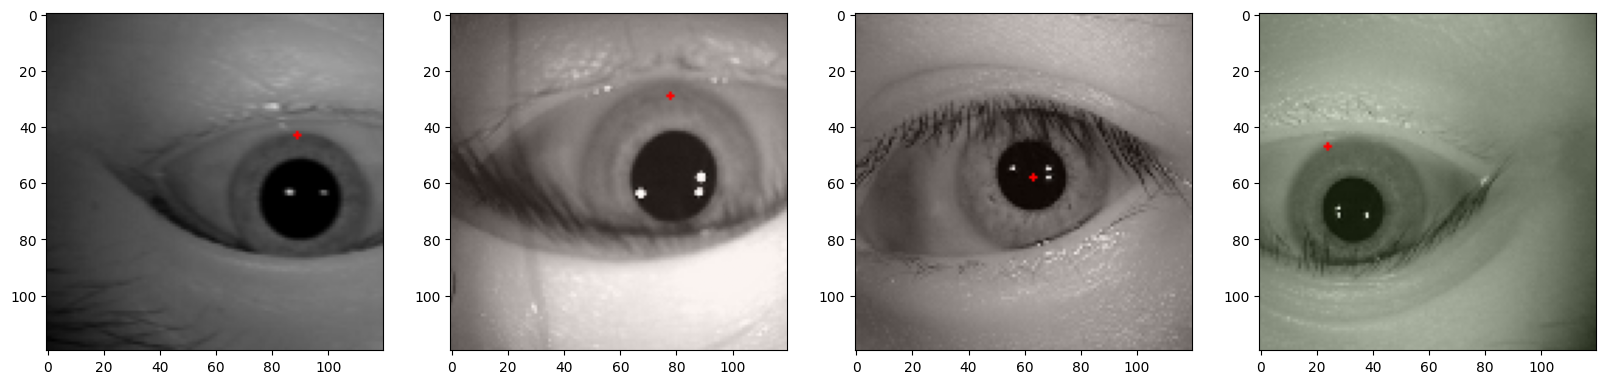

In [166]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    print(sample_coords[:2])
    #[640,480,640,480]
    r= math.sqrt(((sample_coords[2]*(120/450)*640))-(sample_coords[0]*(120/450)*640)))**2 + ((sample_coords[3]*(120/450)*480))-(sample_coords[1]*(120/450)*480)))**2 )
    r=int(r)
    print(r)
    writable_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)  # Convert to writable format
    cv2.circle(writable_image, tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)), r, (255, 0, 0), 2)
    '''
    cv2.circle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),r,
                        (255,0,0), 2)'''

    ax[idx].imshow(writable_image)
